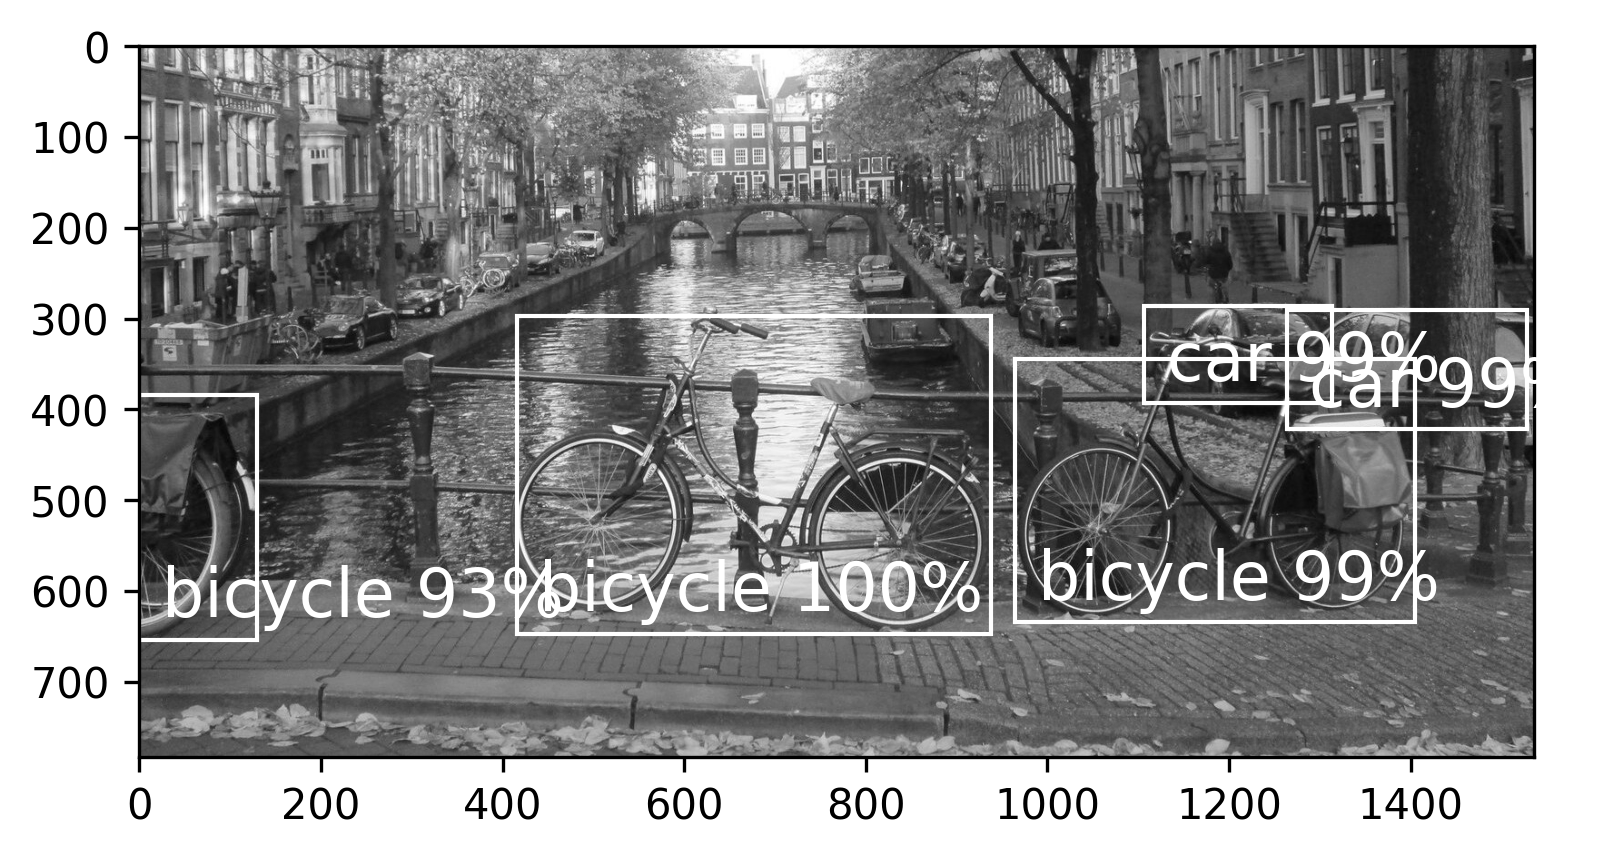

In [32]:
%matplotlib inline
import numpy as np
import tensorflow_hub as hub
from keras.preprocessing import image
from matplotlib import pyplot as plt, patches

dpi = 300
font_size = 14
color = 'white'
min_score = 0.8
min_size = 100
label_offset = 25, -25

# Load the img and convert it to a numpy array
img = image.load_img('amsterdam-street.jpg')
img_t = image.img_to_array(img)
img_w, img_h = img.size


# Read the labels from coco_labels. The entire COCO
# (Common Objects in COntext) dataset is available at:
# https://cocodataset.org/#download
labels = open('coco_labels.txt').read().splitlines()
model = hub.load('https://tfhub.dev/tensorflow/mask_rcnn/'
                 'inception_resnet_v2_1024x1024/1')
out = model(np.array([img_t]))

# The box coordinates are normalized to [0, 1]
img_dim = np.array([img.size[1], img.size[0]] * 2)
result = zip(
    out['detection_boxes'][0] * img_dim,
    out['detection_classes'][0],
    out['detection_scores'][0],
)

# Increase the DPI to get a larger output image
plt.figure(dpi=dpi)
img_desc = plt.subplot()

# Walk through the list of detections and print the results
for (l, t, r, b), label_idx, score in result:
    label_idx = int(label_idx)
    # Skip objects that are questionable matches
    if score < min_score:
        continue

    # Skip tiny matches
    h, w = b - t, r - l,
    if w < min_size or h < min_size:
        continue

    # Draw the bounding box and label
    img_desc.add_patch(patches.Rectangle(
        (t, l), h, w, fill=False, color=color))
    label = f'{labels[label_idx]} {score * 100:.0f}%'
    img_desc.text(
        t + label_offset[0], r + label_offset[1], label,
        fontsize=font_size, color=color)

# Output the img as a large grayscale for print purposes
plt.imshow(img.convert('L'), cmap='gray')
